In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df= pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Attributes
age - Numerical Variable - Customers' Age

job - Categorical Variable - Customer's Job Type - ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital - Categorical Variable - Customer's Marital Status - ('divorced','married','single')

education - Categorical Variable - Customer's Education Level .('primary','secondary','tertiary','unknown')

default - Categorical Variable - Customer's credit default status (binary : yes/ no)

balance - Numerical Variable - Customer's average yearly balance in Euros (numeric)

housing - Categorical Variable - Customer's housing loan status ('no','yes')

loan - Categorical Variable - Customer's housing personal loan status loan? ( 'no','yes')

contact - Categorical Variable - Customer's preferbale communication mode ( 'cellular','telephone')

day - Numerical Variable - last contact day of the month

month - Numerical Variable - last contact month of year

duration - Numerical Variable - last call duration, in seconds

campaign - Numerical Variable - number of calls performed during the campaign

pdays - Numerical Variable - number of days that passed by after the client was last contacted from a previous campaign

previous - Numerical Variable - number of calls performed before this campaign and for this client

poutcome - Categorical Variable - outcome of the previous marketing campaign ( 'failure','nonexistent','success'))



target - deposit - Binary Variable - has the client subscribed a bank deposit? (binary: "yes","no")

In [94]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000
mean,41.232,1528.539,15.658,371.994,2.508,51.330,0.833
std,11.913,3225.413,8.421,347.128,2.722,108.758,2.292
min,18.000,-6847.000,1.000,2.000,1.000,-1.000,0.000
25%,32.000,122.000,8.000,138.000,1.000,-1.000,0.000
50%,39.000,550.000,15.000,255.000,2.000,-1.000,0.000
75%,49.000,1708.000,22.000,496.000,3.000,20.750,1.000
max,95.000,81204.000,31.000,3881.000,63.000,854.000,58.000


In [95]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [96]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]= pd.Categorical(df[col])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.3 KB


In [98]:
df.shape

(11162, 17)

Preliminary EDA , Descriptive Statistics and Data Wrangling with Target Variable

In [99]:
##Data Cleaning
df.pdays = df.pdays.abs() # since pdays has too much data with -1 value which seems to be input error.
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000
mean,41.232,1528.539,15.658,371.994,2.508,52.822,0.833
std,11.913,3225.413,8.421,347.128,2.722,108.042,2.292
min,18.000,-6847.000,1.000,2.000,1.000,1.000,0.000
25%,32.000,122.000,8.000,138.000,1.000,1.000,0.000
50%,39.000,550.000,15.000,255.000,2.000,1.000,0.000
75%,49.000,1708.000,22.000,496.000,3.000,20.750,1.000
max,95.000,81204.000,31.000,3881.000,63.000,854.000,58.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


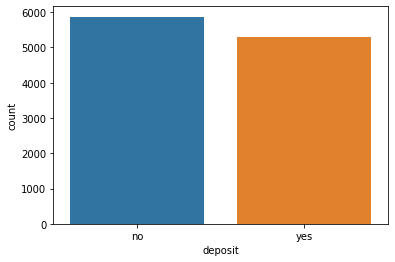

In [100]:
sns.countplot(df['deposit'])

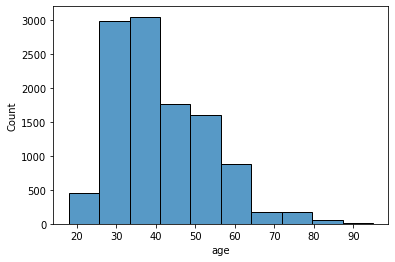

In [101]:
sns.histplot(df['age'],bins=10)

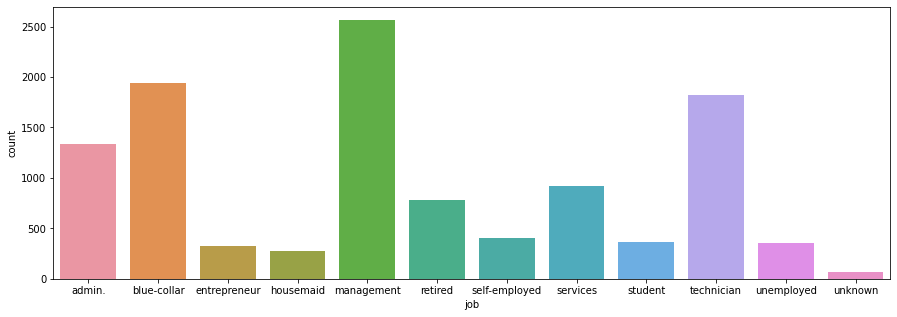

In [102]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df)

Text(0, 0.5, 'Frequency of Purchase')

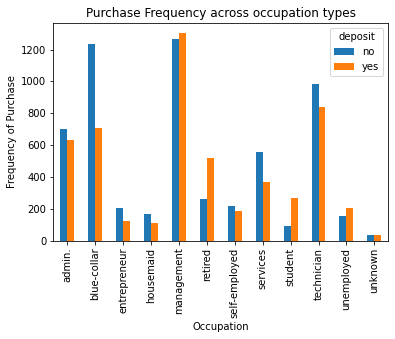

In [103]:
%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency across occupation types')
plt.xlabel('Occupation')
plt.ylabel('Frequency of Purchase')

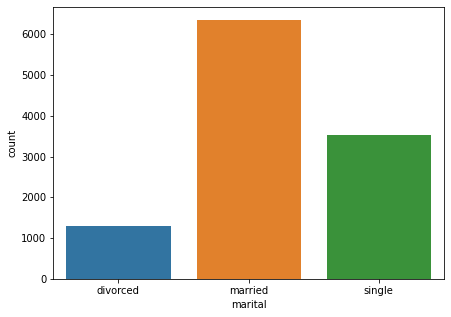

In [104]:
plt.figure(figsize=(7,5))
sns.countplot(x='marital',data=df)

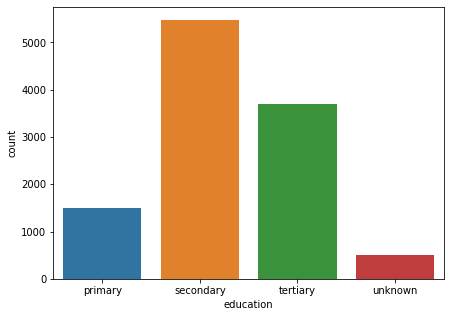

In [105]:
plt.figure(figsize=(7,5))
sns.countplot(x='education',data=df)

Text(0, 0.5, 'Proportion of Customers')

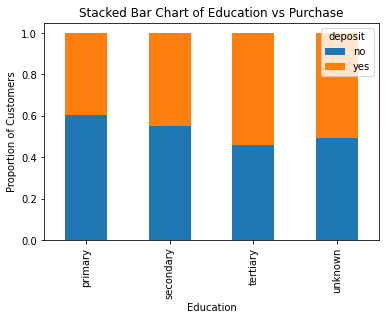

In [106]:
table=pd.crosstab(df.education,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

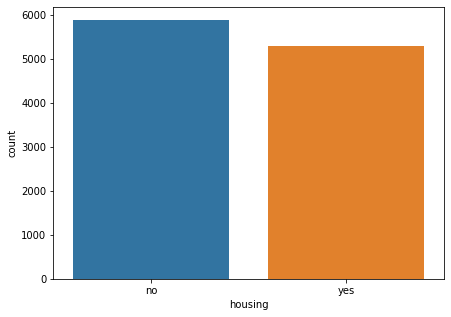

In [107]:
plt.figure(figsize=(7,5))
sns.countplot(x='housing',data=df)

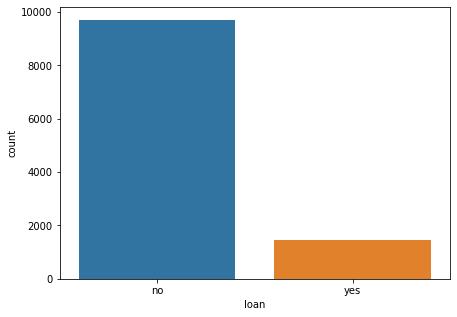

In [108]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan',data=df)

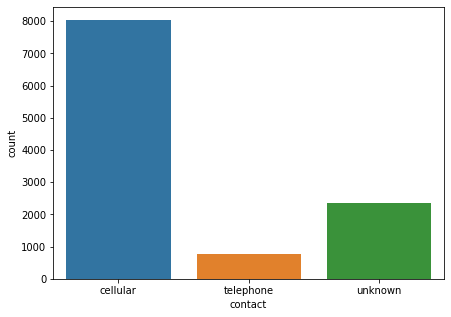

In [109]:
plt.figure(figsize=(7,5))
sns.countplot(x='contact',data=df)

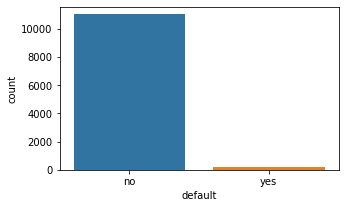

In [110]:
plt.figure(figsize=(5,3))
sns.countplot(x='default',data=df)

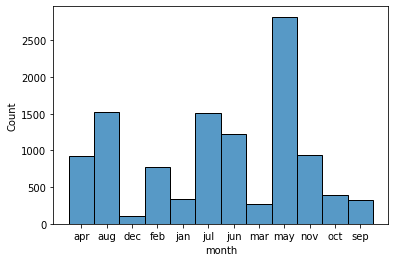

In [111]:
sns.histplot(df['month'])

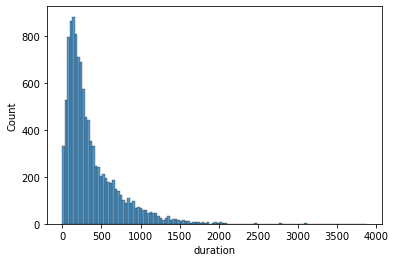

In [112]:
sns.histplot(df['duration'])

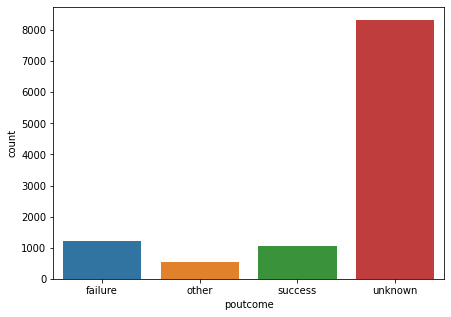

In [113]:
plt.figure(figsize=(7,5))
sns.countplot(x='poutcome',data=df)

In [114]:
df.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f683d065410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f683d06b450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f683d073490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f683d06bf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f683d065990>,
  <matplotlib.lines.Line2D at 0x7f683d065ed0>]}

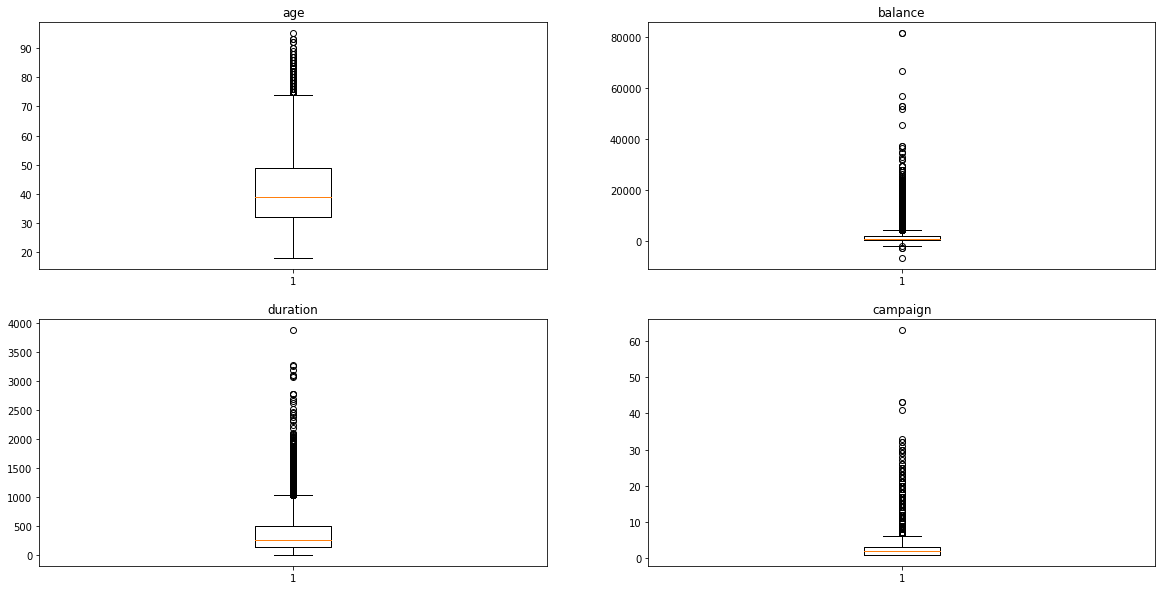

In [115]:
#checking for outliers
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) 
plt.title('age')
plt.boxplot(df['age'])
plt.subplot(2,2,2)
plt.title('balance')
plt.boxplot(df['balance'])
plt.subplot(2,2,3) 
plt.title('duration')
plt.boxplot(df['duration'])
plt.subplot(2,2,4)
plt.title('campaign')
plt.boxplot(df['campaign'])

We see there are outliers in feature 'balance' which needs to be removed or imputed

In [116]:
# Missing values and categorical data treatment with convenient data for analysis

map_df= {"marital": {"single":0 ,"married":1,"divorced":2},
                "contact": {"unknown":0,"telephone":1,"cellular":2},
                "poutcome":{"other":-1,"unknown":0,"success":1,"failure":2},
                "month": {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "default":{"yes":1, "no":0},
                "loan":{"yes":1, "no":0},
                "housing":{"yes":1, "no":0},
                "deposit": {"no":0,"yes":1}
                }
                
df1= df.replace(map_df)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,2,20,4,257,1,1,0,0,0
11158,39,services,1,secondary,0,733,0,0,0,16,6,83,4,1,0,0,0
11159,32,technician,0,secondary,0,29,0,0,2,19,8,156,2,1,0,0,0
11160,43,technician,1,secondary,0,0,0,1,2,8,5,9,2,172,5,2,0


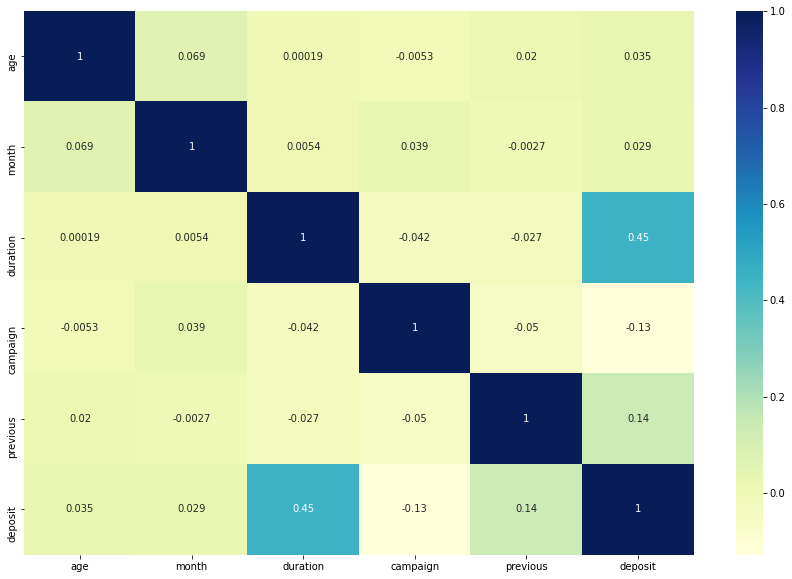

In [117]:
corr_df= df1[['age','month','duration','campaign','previous','deposit']].corr() #correlation amongst the variables
# figure size
plt.figure(figsize=(15,10))
# heatmap
sns.heatmap(corr_df , cmap="YlGnBu", annot=True)
plt.show()

In [118]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,2,20,4,257,1,1,0,0,0
11158,39,services,1,secondary,0,733,0,0,0,16,6,83,4,1,0,0,0
11159,32,technician,0,secondary,0,29,0,0,2,19,8,156,2,1,0,0,0
11160,43,technician,1,secondary,0,0,0,1,2,8,5,9,2,172,5,2,0


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df2 = df1._get_numeric_data()

df2 = df2.drop(['deposit'], axis = 1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]

vif["features"] = df2.columns

vif

,VIF Factor,features
0,10.208,age
1,3.345,marital
2,1.027,default
3,1.263,balance
4,1.823,housing
5,1.176,loan
6,4.402,contact
7,4.165,day
8,6.183,month
9,2.094,duration


In [120]:
from scipy.stats import zscore
df1['z_balance']=df1['balance']

In [122]:
df1.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1,2343
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1,45


In [123]:
df1['z_balance'] = zscore(df1['z_balance'])

In [124]:
df1.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1,0.253
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1,-0.460


In [125]:
df1=df1.drop(df1[(df1['z_balance']>3)|(df1['z_balance']<-3)].index, axis=0, inplace=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f683d050450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f683ccddb10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f683ccef110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f683ccddbd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f683cece510>,
  <matplotlib.lines.Line2D at 0x7f683cde2f10>]}

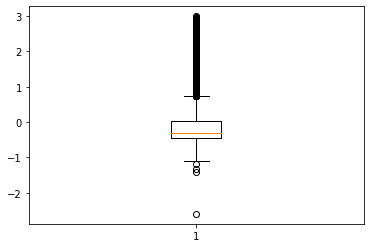

In [126]:
plt.boxplot(df1['z_balance'])

In [127]:
df1_job= pd.get_dummies(df1['job'], prefix='job', drop_first=True)
df1= pd.concat([df1,df1_job],axis=1)
df1_edu= pd.get_dummies(df1['education'], prefix= 'education', drop_first= True)
df1= pd.concat([df1,df1_edu],axis=1)
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,admin.,1,secondary,0,2343,1,0,0,5,5,1042,1,1,0,0,1,0.253,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,56,admin.,1,secondary,0,45,0,0,0,5,5,1467,1,1,0,0,1,-0.460,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,technician,1,secondary,0,1270,1,0,0,5,5,1389,1,1,0,0,1,-0.080,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,55,services,1,secondary,0,2476,1,0,0,5,5,579,1,1,0,0,1,0.294,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,54,admin.,1,tertiary,0,184,0,0,0,5,5,673,2,1,0,0,1,-0.417,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,42,management,0,tertiary,0,0,1,1,0,5,5,562,2,1,0,0,1,-0.474,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,56,management,1,tertiary,0,830,1,1,0,6,5,1201,1,1,0,0,1,-0.217,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,60,retired,2,secondary,0,545,1,0,0,6,5,1030,1,1,0,0,1,-0.305,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,37,technician,1,secondary,0,1,1,0,0,6,5,608,1,1,0,0,1,-0.474,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9,28,services,0,secondary,0,5090,1,0,0,6,5,1297,3,1,0,0,1,1.104,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [128]:
df1= df1.drop(['job','education','balance'],axis=1)
df1.head(5)

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,1,0,0,5,5,1042,1,1,0,0,1,0.253,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,56,1,0,0,0,0,5,5,1467,1,1,0,0,1,-0.460,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,1,0,1,0,0,5,5,1389,1,1,0,0,1,-0.080,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,55,1,0,1,0,0,5,5,579,1,1,0,0,1,0.294,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,54,1,0,0,0,0,5,5,673,2,1,0,0,1,-0.417,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df3 = df1.copy(deep=True)

df3 = df3.drop(['deposit'], axis = 1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

vif["features"] = df3.columns

vif

,VIF Factor,features
0,15.934,age
1,3.440,marital
2,1.034,default
3,2.117,housing
4,1.201,loan
5,4.888,contact
6,4.358,day
7,6.687,month
8,2.135,duration
9,1.906,campaign


In [130]:
from scipy import stats
alpha = 0.05
for i in df1.columns:
    print ([i])
    a,b= stats.shapiro(df1[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['age']
Statistics 0.947364330291748 p-value 0.0
The null hypothesis can be rejected
['marital']
Statistics 0.7747988104820251 p-value 0.0
The null hypothesis can be rejected
['default']
Statistics 0.09841358661651611 p-value 0.0
The null hypothesis can be rejected
['housing']
Statistics 0.6356281638145447 p-value 0.0
The null hypothesis can be rejected
['loan']
Statistics 0.39954257011413574 p-value 0.0
The null hypothesis can be rejected
['contact']
Statistics 0.5826665759086609 p-value 0.0
The null hypothesis can be rejected
['day']
Statistics 0.95890212059021 p-value 0.0
The null hypothesis can be rejected
['month']
Statistics 0.9587414264678955 p-value 0.0
The null hypothesis can be rejected
['duration']
Statistics 0.8003811836242676 p-value 0.0
The null hypothesis can be rejected
['campaign']
Statistics 0.5374068021774292 p-value 0.0
The null hypothesis can be rejected
['pdays']
Statistics 0.5538522005081177 p-value 0.0
The null hypothesis can be rejected
['previous']
Statistics 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [131]:
X_sig = df1.drop(['deposit'], axis=1)
y_sig= df1['deposit']

In [132]:
X_sig

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,1,0,0,5,5,1042,1,1,0,0,0.253,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,56,1,0,0,0,0,5,5,1467,1,1,0,0,-0.460,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,1,0,1,0,0,5,5,1389,1,1,0,0,-0.080,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,55,1,0,1,0,0,5,5,579,1,1,0,0,0.294,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,54,1,0,0,0,0,5,5,673,2,1,0,0,-0.417,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,0,1,0,2,20,4,257,1,1,0,0,-0.474,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11158,39,1,0,0,0,0,16,6,83,4,1,0,0,-0.247,0,0,0,0,0,0,1,0,0,0,0,1,0,0
11159,32,0,0,0,0,2,19,8,156,2,1,0,0,-0.465,0,0,0,0,0,0,0,0,1,0,0,1,0,0
11160,43,1,0,0,1,2,8,5,9,2,172,5,2,-0.474,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [133]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X_sig,y_sig,test_size = 0.0001 , random_state= 123)

In [134]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [135]:
import statsmodels.api as sm
# building the model and fitting the data
log_reg = sm.Logit(y_train,X_train).fit()

# printing the summary table
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.472035
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                10987
Model:                          Logit   Df Residuals:                    10959
Method:                           MLE   Df Model:                           27
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:                  0.3175
Time:                        08:12:53   Log-Likelihood:                -5186.2
converged:                       True   LL-Null:                       -7599.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8319      0.213     -3.903      0.000      -1.250      -0.414
x2            -0.3262      0.

education_unknown(X27), education_tertiary(X28) and poutcome(X13) and zbalance(X14) and job_retired(X19) and job_student(X22) has p-value>0.05 i.e accept H0 i.e features are not significant hence can be discarded.
Will keep zbalance as pvalue is 0.07 much closer to alpha 0.05

In [136]:
X_sig.iloc[:,[12,13,18,21,26,27]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10989 entries, 0 to 11161
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poutcome            10989 non-null  int64  
 1   z_balance           10989 non-null  float64
 2   job_retired         10989 non-null  uint8  
 3   job_student         10989 non-null  uint8  
 4   education_tertiary  10989 non-null  uint8  
 5   education_unknown   10989 non-null  uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 300.5 KB


Will be dropping the above variables(except zbalance) to compute logistic regression but will keep them in other models

# Logistic Regression

In [137]:
df_lr= df1.copy(deep=True)

In [138]:
df_lr.head(1)

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,1,0,0,5,5,1042,1,1,0,0,1,0.253,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [139]:
cols=[12,19,22,27,28]
df_lr.iloc[:,cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10989 entries, 0 to 11161
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   poutcome            10989 non-null  int64
 1   job_retired         10989 non-null  uint8
 2   job_student         10989 non-null  uint8
 3   education_tertiary  10989 non-null  uint8
 4   education_unknown   10989 non-null  uint8
dtypes: int64(1), uint8(4)
memory usage: 214.6 KB


In [140]:
df_lr= df_lr.drop(df_lr.columns[cols], axis = 1)
df_lr

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_technician,job_unemployed,job_unknown,education_secondary
0,59,1,0,1,0,0,5,5,1042,1,1,0,1,0.253,0,0,0,0,0,0,0,0,0,1
1,56,1,0,0,0,0,5,5,1467,1,1,0,1,-0.460,0,0,0,0,0,0,0,0,0,1
2,41,1,0,1,0,0,5,5,1389,1,1,0,1,-0.080,0,0,0,0,0,0,1,0,0,1
3,55,1,0,1,0,0,5,5,579,1,1,0,1,0.294,0,0,0,0,0,1,0,0,0,1
4,54,1,0,0,0,0,5,5,673,2,1,0,1,-0.417,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,0,1,0,2,20,4,257,1,1,0,0,-0.474,1,0,0,0,0,0,0,0,0,0
11158,39,1,0,0,0,0,16,6,83,4,1,0,0,-0.247,0,0,0,0,0,1,0,0,0,1
11159,32,0,0,0,0,2,19,8,156,2,1,0,0,-0.465,0,0,0,0,0,0,1,0,0,1
11160,43,1,0,0,1,2,8,5,9,2,172,5,0,-0.474,0,0,0,0,0,0,1,0,0,1


In [141]:
X_lr = df_lr.drop(['deposit'], axis=1)
y_lr= df_lr['deposit']

In [142]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X_lr,y_lr,test_size = 0.30 , random_state= 321)

In [143]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [144]:
#LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y_pred=classifier.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

79.16287534121929

In [147]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1415,  304],
       [ 383, 1195]])

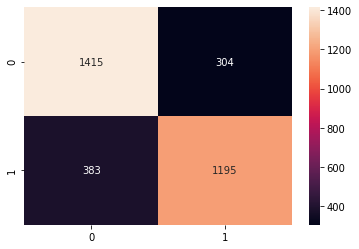

In [158]:
sns.heatmap(cm, annot= True,fmt='d')

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1719
           1       0.80      0.76      0.78      1578

    accuracy                           0.79      3297
   macro avg       0.79      0.79      0.79      3297
weighted avg       0.79      0.79      0.79      3297



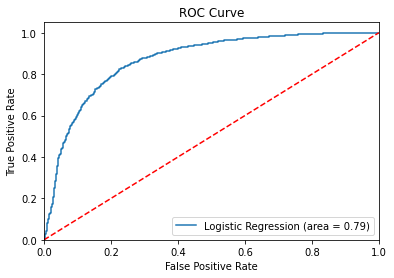

In [160]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [164]:
df1.head()

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,1,0,0,5,5,1042,1,1,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,56,1,0,0,0,0,5,5,1467,1,1,0,0,1,-0.46,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,1,0,1,0,0,5,5,1389,1,1,0,0,1,-0.08,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,55,1,0,1,0,0,5,5,579,1,1,0,0,1,0.29,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,54,1,0,0,0,0,5,5,673,2,1,0,0,1,-0.42,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [165]:
X = df1.drop(['deposit'], axis=1)
y= df1['deposit']
X.head(1)

,age,marital,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,z_balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,59,1,0,1,0,0,5,5,1042,1,1,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [166]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.30 , random_state= 100)

In [167]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier() 
classifier_dt.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred)*100

78.70791628753412

In [169]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1399,  357],
       [ 345, 1196]])

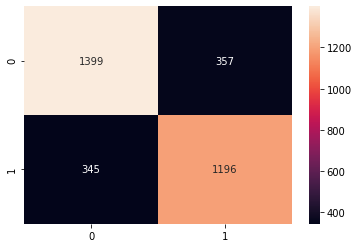

In [170]:
sns.heatmap(cm, annot= True ,fmt='d')

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1756
           1       0.77      0.78      0.77      1541

    accuracy                           0.79      3297
   macro avg       0.79      0.79      0.79      3297
weighted avg       0.79      0.79      0.79      3297



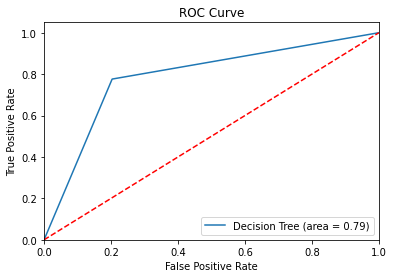

In [172]:
dec_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [173]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier() 
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)

In [174]:
accuracy_score(y_test,y_pred)*100
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1435,  321],
       [ 182, 1359]])

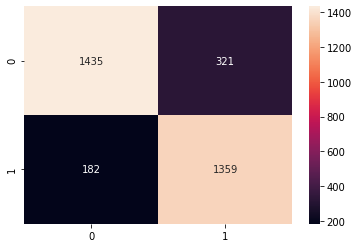

In [175]:
sns.heatmap(cm, annot= True,fmt='d')

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1756
           1       0.81      0.88      0.84      1541

    accuracy                           0.85      3297
   macro avg       0.85      0.85      0.85      3297
weighted avg       0.85      0.85      0.85      3297



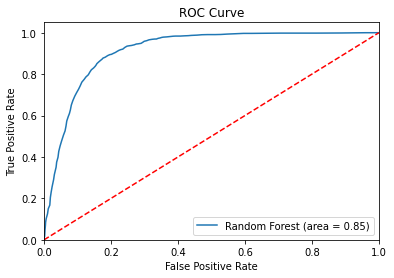

In [177]:
rf_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [178]:
fi_model = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': classifier_rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
8,duration,0.35
13,z_balance,0.09
0,age,0.08
7,month,0.08
6,day,0.07
5,contact,0.04
10,pdays,0.04
9,campaign,0.04
12,poutcome,0.03
11,previous,0.03


# Randomized Search CV- Random Forest

In [194]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 321)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring ='roc_auc', cv = 5, 
                        n_iter = 10, verbose = 1, random_state= 111)

# Fit 
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [195]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 0.8999999999999999,
 'max_leaf_nodes': 45,
 'min_samples_split': 2,
 'n_estimators': 106}

In [196]:
best_model = rs.best_estimator_

In [197]:
y_pred_rs = best_model.predict(X_test)

In [198]:
cm = metrics.confusion_matrix(y_test,y_pred_rs)
cm

array([[1430,  326],
       [ 186, 1355]])

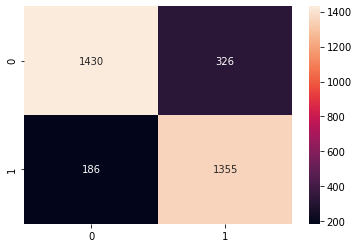

In [199]:
sns.heatmap(cm, annot= True,fmt='d')

In [200]:
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1756
           1       0.81      0.88      0.84      1541

    accuracy                           0.84      3297
   macro avg       0.85      0.85      0.84      3297
weighted avg       0.85      0.84      0.84      3297



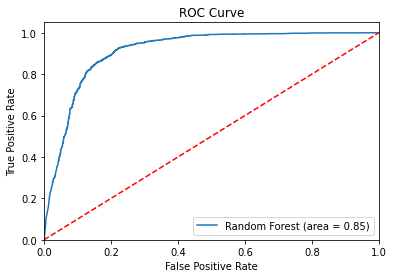

In [201]:
rf_roc_auc = roc_auc_score(y_test,y_pred_rs)
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# XgBoost 

In [187]:
##XGBOOST
from xgboost import XGBClassifier
classifier_xg = XGBClassifier() 
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)

In [188]:
accuracy_score(y_test,y_pred)*100

84.65271458902032

In [189]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1449,  307],
       [ 199, 1342]])

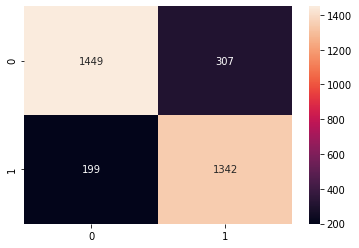

In [190]:
sns.heatmap(cm, annot= True,fmt='d')

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1756
           1       0.81      0.87      0.84      1541

    accuracy                           0.85      3297
   macro avg       0.85      0.85      0.85      3297
weighted avg       0.85      0.85      0.85      3297



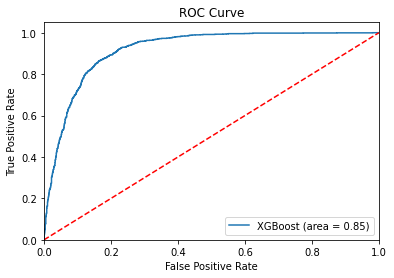

In [192]:
xg_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_xg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

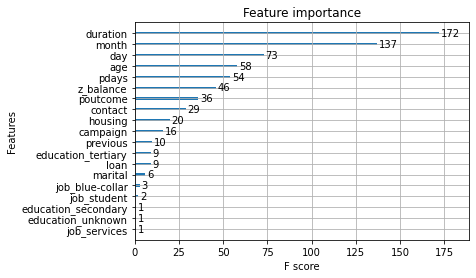

In [193]:
from xgboost import plot_importance
plot_importance(classifier_xg)
plt.show()

XGBoost Classifier giving best score without using any hyperparameter